Image information: uint16, shape: (982, 1311)


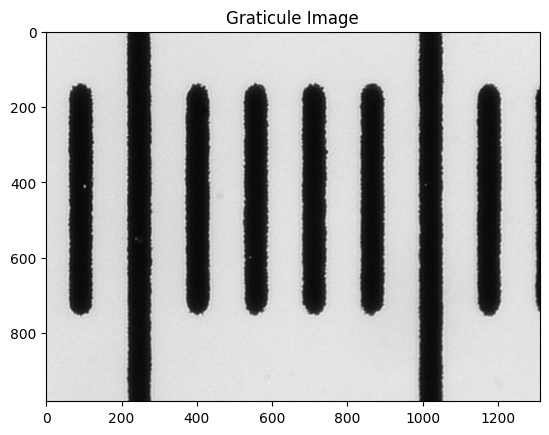

In [7]:
"""
Adapted by Jason Carmi from Matlab source file "EColiSize.m"
Phillips et al. Physical Biology of the Cell
Chapter 2 | What and Where: Construction Plans for Cells and Organisms
Computational Exploration: Sizing Up E. coli
http://rpdata.caltech.edu/pboc2e/code/Sizing%20up%20E.%20coli.zip

Most of the original comments were left as-is, with some updates/changes
for Python
"""

import numpy as np
import matplotlib.pyplot as plt
import imageio

# In figure 2.3(C) we show a typical picture of E. coli under 100x
# magnification obtained using phase contrast microscopy. Using such a picture
# we can estimate the cell's size. However, we need a conversion between the
# size in pixels we would obtain and actual physical dimensions. In order to
# do that we can take a picture of a calibrated pattern under the same
# imaging conditions. Since we know the size of the pattern in this
# calibration grid in microns we can come up with a calibration for our
# pixels.

# Let's start by loading the image of the graticule. This graticule consists
# of lines separated by 10um.
graticule = imageio.v3.imread('Graticule100x.tif')

# Now, let's display it on the screen. Before that let's check the data type
# of the image by doing
print(f"Image information: {graticule.dtype}, shape: {graticule.shape}")

# Notice that the image is in 16-bit format.
# Not by limitation but for simplicity and conformity with the original exercise,
# we display the image in grayscale and normalize to increase contrast.
plt.figure(1)
plt.imshow(graticule, cmap='gray', vmin=np.min(graticule), vmax=np.max(graticule))
plt.title('Graticule Image')
plt.show()

Pixel value at (20, 10): 515


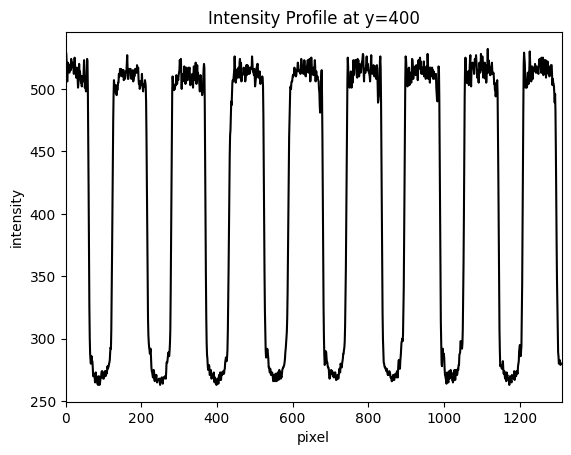

In [8]:
# We can now see the lines spaced by 10um. It might be a little bit hard to
# judge where the boundaries of each line are by just looking at the image.
# One alternative is to plot a profile of the image along the x-axis. Since
# "Graticule" is just a matrix indicating the pixel value at each position
# this is easy to implement. For example, if we want the pixel value at
# position x=10 and y=20 we carry out the operation
print(f"Pixel value at (20, 10): {graticule[20, 10]}")

# Remember that matrices in Matlab (and Python) are accessed by first giving the row (the
# y-axis value for an image) and then the column (the x-axis value). Also,
# images have their (0,0) coordinate at the top left.
# If I want to obtain the intensity along the x-axis at say, y=400 I just
# have to type
intensity_profile = graticule[400, :]

# We can now just plot this long list of numbers
plt.figure(2)
plt.plot(intensity_profile, '-k') # solid, black line
plt.xlim([0, graticule.shape[1]])
plt.xlabel('pixel')
plt.ylabel('intensity')
plt.title('Intensity Profile at y=400')
plt.show()

In [3]:
# With this plot in hand it is now a little bit easier to determine the
# distance between the lines. One easy way to do it is to choose the "data
# cursor" on the menu bar on top of the plot we just displayed (it's the one
# with the cross and the little yellow box icon). If you choose this tool
# you'll be able to move along the line and record the x-position. For
# example, the position of the left-most boundary is at x=62, approximately.
# Eight lines later we are at x=1299. As a result we have
pixels_between_lines = 1299 - 62
nm_per_pixel = 1000. * 8 * 10 / pixels_between_lines
# And we obtain 64.7 nm/pixel.
print(f"Calibration: {nm_per_pixel:.2f} nm/pixel")

Calibration: 64.67 nm/pixel


In [ ]:
"""
# !! matplotlib.pyplot.ginput() requires interactive mode !!
# ...and therefore cannot be run in a Jupyter notebook

# A more sophisticated alternative is to select the points we want to use to
# calculate the distance with the mouse. This can be done using the function
# "ginput". For example, if we do "ginput(2)" Python will wait for you
# to click twice on the image.

plt.figure(2)
plt.plot(intensity_profile, '-k')
plt.xlim([0, graticule.shape[1]])
plt.xlabel('pixel')
plt.ylabel('intensity')
plt.title('Intensity Profile at y=400')
plt.title('Graticule Image')

clicks = plt.ginput(2, timeout=-1)
print(clicks)

# Each row of "clicks" corresponds to the coordinates of each click. The
# first element in a row is the x-coordinate and the second corresponds to
# the y-coordinate. As a result we can calculate the distance as
pixels_between_lines = abs(clicks[1][0] - clicks[0][0])
print(f'Distance between clicks: {pixels_between_lines}')
nm_per_pixel = 1000. * 8 * 10 / pixels_between_lines
print(f'Calibration by clicks: {nm_per_pixel:.2f} nm/pixel')
# Which is approximately the distance we obtained using the data cursor.
plt.close()
"""

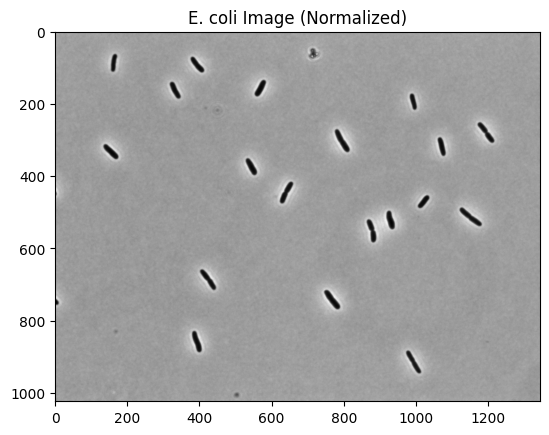

In [13]:
# With this calibration in hand we are now ready to put a scale bar on our
# images. Let's start by loading the image of E. coli taken with the same
# magnification and displaying it.
ecoli = imageio.v3.imread('Ecoli100x.tif')

# In order to display this image we will normalize it such that the
# brightest pixel is 1 and the dimmest one is 0.
# We do this using
ecoli_norm = (ecoli - np.min(ecoli)) / (np.max(ecoli) - np.min(ecoli))

# Now we can display the normalized image
plt.figure(3)
plt.imshow(ecoli_norm, cmap='gray')
plt.title('E. coli Image (Normalized)')
plt.show()

Scale bar length in pixels: 15.46
Image shape: (1024, 1344)


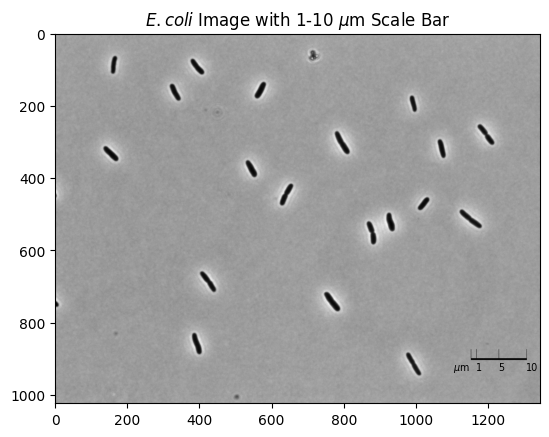

In [15]:
# We want to introduce a scale bar into this image. One way to do this is to
# select a rectangle of the image of a certain size and turn it black. For
# example, if we wanted the scale bar to be 2 um long we would have to make
# it 2um dividied by our calibration of about 64.7 nm/pixel
# or 31 pixels long, approximately.
scale_bar_length = 1_000 / nm_per_pixel #  1um scale
print(f"Scale bar length in pixels: {scale_bar_length:.2f}")

# Let's grab a section of the Ecoli image and turn it into zeros. For
# example, let's do it around the bottom right corner of the image. The size
# of the image is
print(f'Image shape: {ecoli_norm.shape}')

# So, we can choose...
scale_bar_xL = 1150 # left-most X for the scale bar
scale_bar_y = 900 #
scale_bar_thickness = 5
scale_bar_height = 25
scale_bar_offset = { # a dictionary for readability
    '1': int(scale_bar_length),
    '5': int(5*scale_bar_length),
    '10':int(10*scale_bar_length)
}


#  Horizontal line for scale
ecoli_norm[
    scale_bar_y : scale_bar_y + scale_bar_thickness,
    scale_bar_xL : 1+scale_bar_xL + scale_bar_offset['10']
] = 0

#  Notches
ecoli_norm[ #  0
    scale_bar_y - scale_bar_height : 1+scale_bar_y,
    scale_bar_xL : 1+scale_bar_xL
] = ecoli_norm[ #  1
    scale_bar_y - scale_bar_height : 1+scale_bar_y,
    scale_bar_xL + scale_bar_offset['1'] : 1+scale_bar_xL + scale_bar_offset['1']
] = ecoli_norm[ #  5
    scale_bar_y - scale_bar_height : 1+scale_bar_y,
    scale_bar_xL + scale_bar_offset['5'] : 1+scale_bar_xL + scale_bar_offset['5']
] = ecoli_norm[ #  10
    scale_bar_y - scale_bar_height : 1+scale_bar_y,
    scale_bar_xL + scale_bar_offset['10'] : 1+scale_bar_xL + scale_bar_offset['10']
] = 0

# Notice that here we are choosing a rectangle in the image of height 5
# pixels and width calculated from scale_bar_length.
# Text is top-aligned to 10 pixels below the starting y
# (5 pixels below the line because the width of the scale bar is 5 pixels)
plt.figure(4)
plt.imshow(ecoli_norm, cmap='gray')
plt.title(r"$\it{E. coli}$ Image with 1-10 $\mu$m Scale Bar")
plt.text(scale_bar_xL, scale_bar_y+10,r'$\mu$m', fontsize='x-small', horizontalalignment='right', verticalalignment='top')
plt.text(scale_bar_xL+scale_bar_offset['1'], scale_bar_y+10,'1', fontsize='x-small', horizontalalignment='left', verticalalignment='top')
plt.text(scale_bar_xL+scale_bar_offset['5'], scale_bar_y+10,'5', fontsize='x-small', horizontalalignment='left', verticalalignment='top')
plt.text(scale_bar_xL+scale_bar_offset['10'], scale_bar_y+10,'10', fontsize='x-small', horizontalalignment='left', verticalalignment='top')


# If we want to save this image we just have to do...
plt.savefig('EcoliCalibrated.png', pad_inches=0)

plt.show() # display the final figure